In [3]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.insert(1, "../../")
import matplotlib.pyplot as plt
import matplotlib

from rl_research.utils import plot_scores_grid

In [2]:
cd ..

/home/rmapkay/research_project


In [4]:
exp = ['gridlength15', 'gridlength20_2', 'gridlength25']
exp_map = {
    'gridlength15': '15',
    'gridlength20_2': '20',
    'gridlength25': '25'
}

In [5]:
#u must be in this directory /home/rmapkay/research_project/experiments
algos = ['reinforce', 'reinforce_st', 'reinforce_seq', 'reinforce_seq_edited']
mean = {}
error = {}

for a in algos:
    for e in exp:
        d = pd.read_csv(f'./experiments/data/{e}/{a}.csv', header=[0, 1], skipinitialspace=True)
        mean[(exp_map[e], a)] = d.sum().mean()
        error[(exp_map[e], a)] = d.sum().std()

In [6]:
mean_upd = {a:[] for a in algos}
error_upd = {a:[] for a in algos}
for k, v in mean.items():
    mean_upd[k[1]].append(v)
for k, v in error.items():
    error_upd[k[1]].append(v)

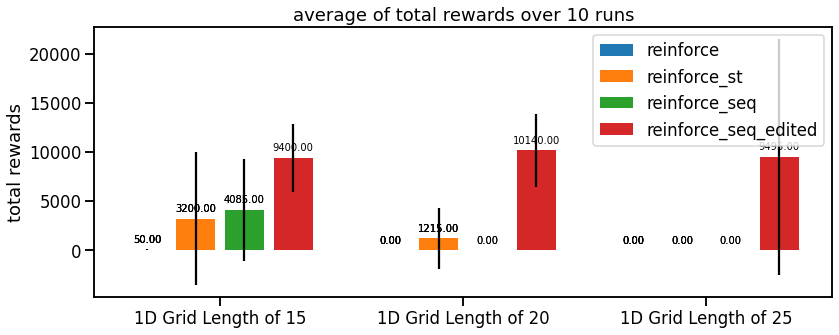

In [7]:
labels = [f'1D Grid Length of {L}' for L in exp_map.values()]
num_runs= 10
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 5))

if len(algos) == 4:
    pos = [-1.5, -0.5, 0.5, 1.5]
if len(algos) == 3:
    pos = [-1, 0, 1]

for i, a in enumerate(algos):
    mean = np.array(mean_upd[a])
    error = np.array(error_upd[a])

    rect = ax.bar(x + pos[i] * width, mean, width*0.8,
                  yerr=error, ecolor='black', label=a)
    #ax.bar_label(rect, padding=3)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():0.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),  size=10,textcoords = 'offset points')
    #ax.annotate(rect)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('total rewards')
ax.set_title(f'average of total rewards over {num_runs} runs')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend()

fig.tight_layout()

plt.show()

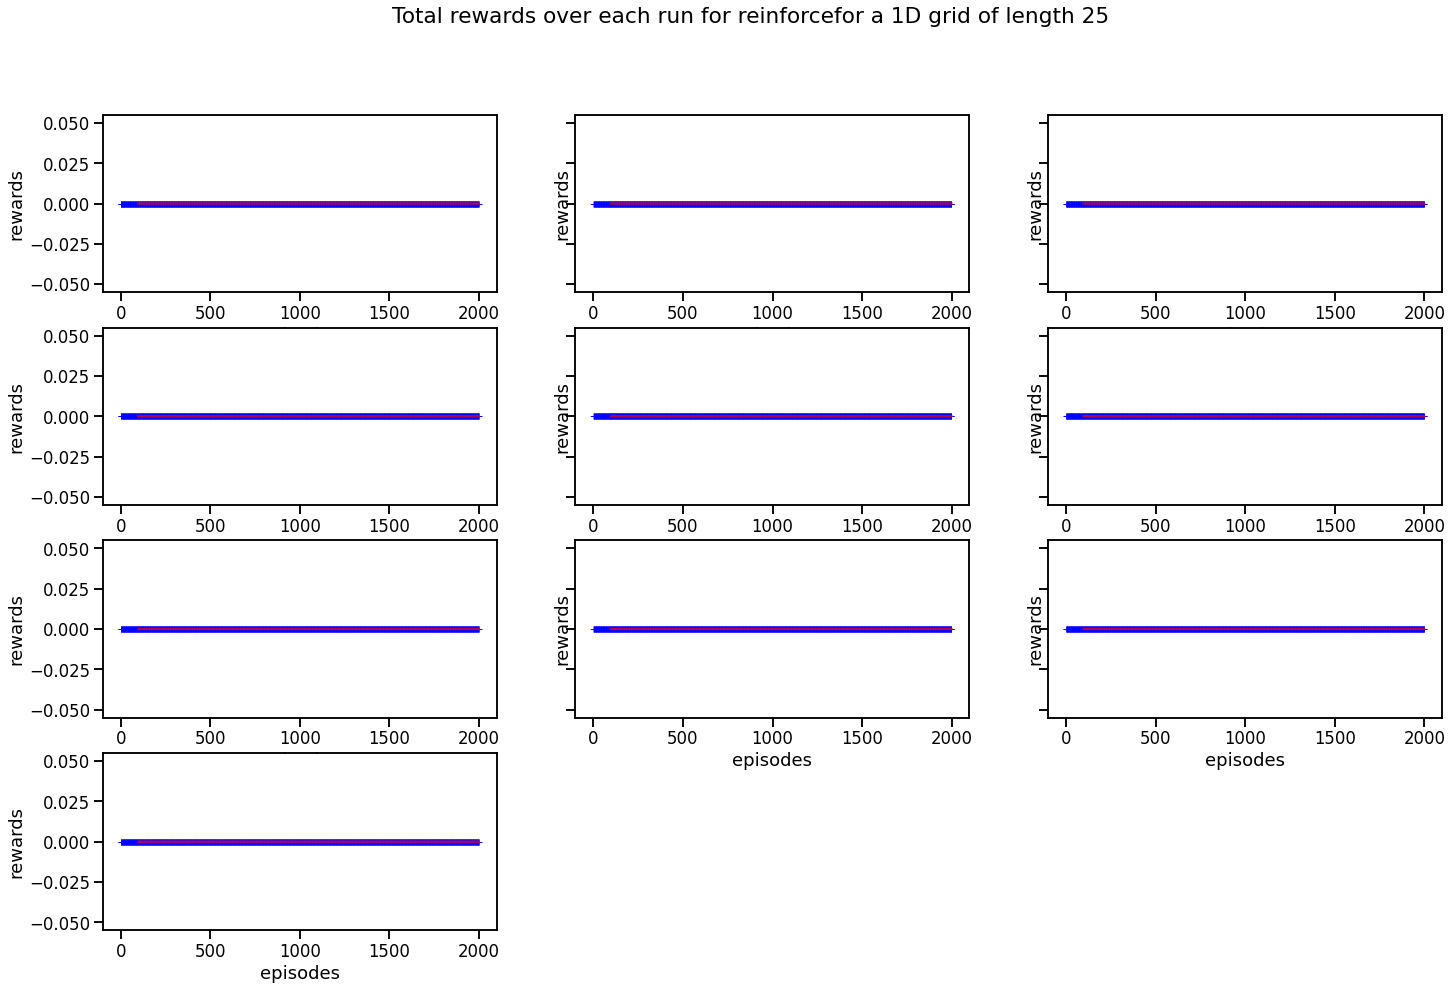

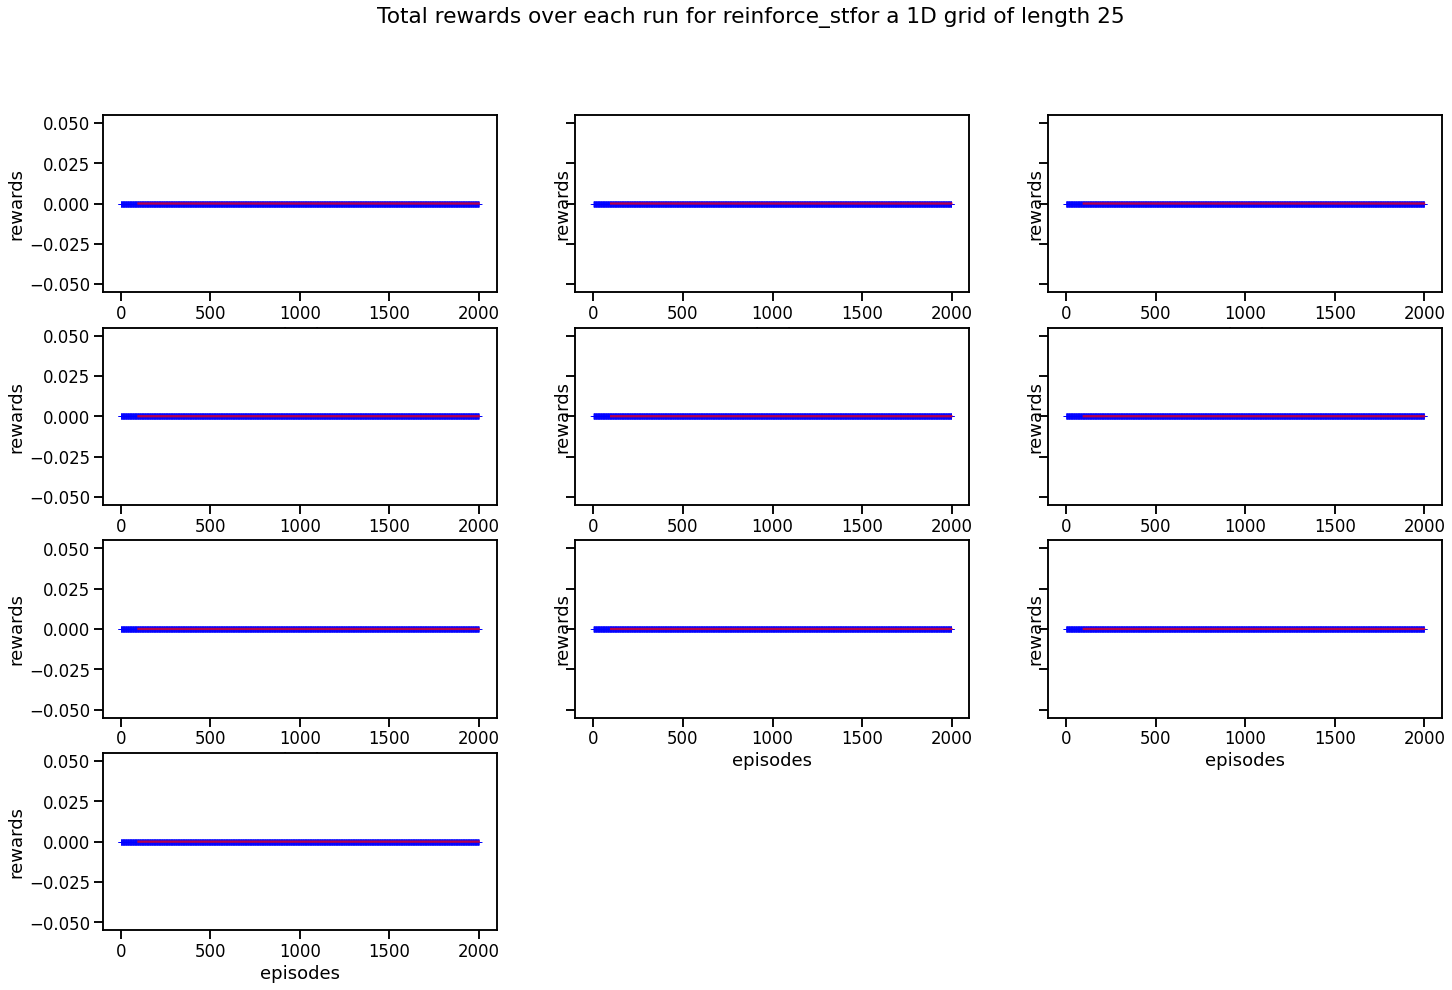

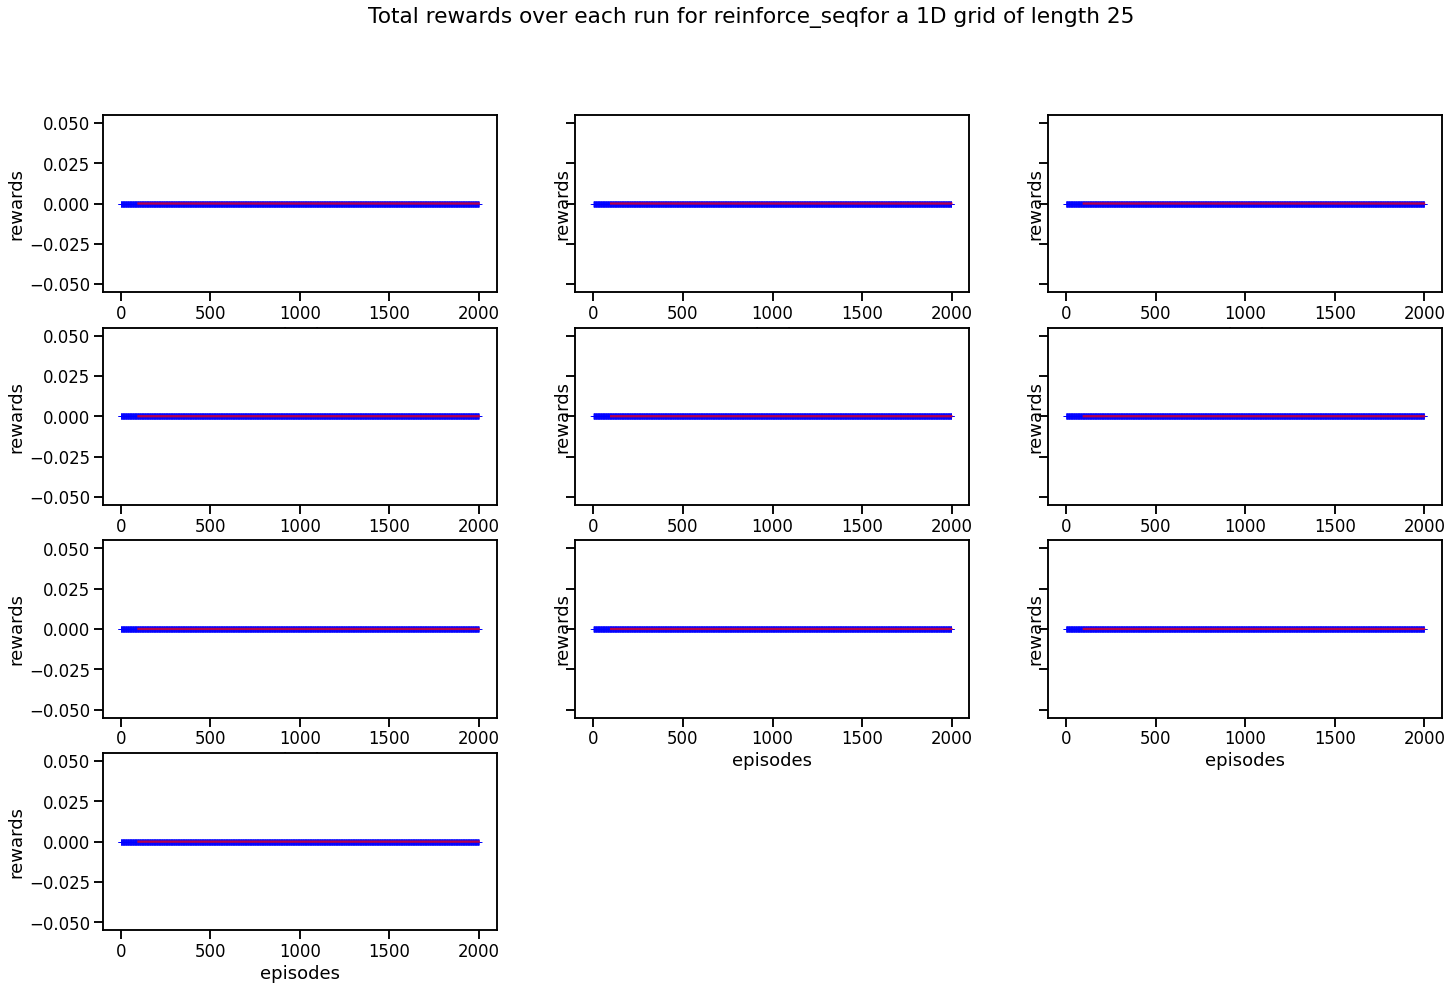

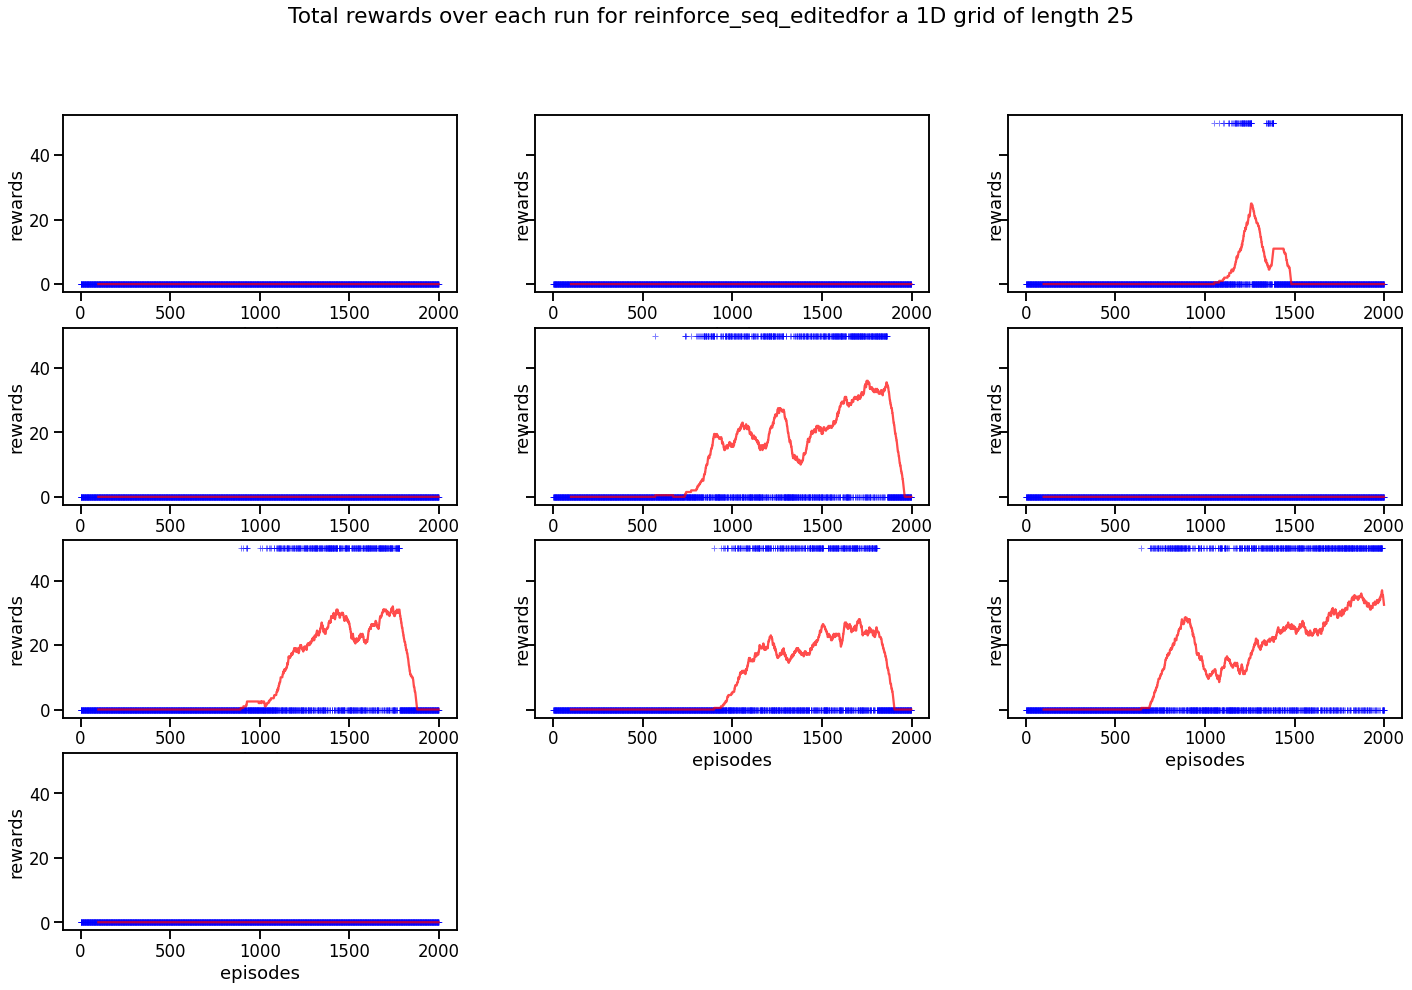

In [33]:
exp = './experiments/data/' + 'gridlength25'

data = {}

algos = [x[:-4] for x in os.listdir(f'{exp}')]
algos.sort(key=lambda x: len(x))

for a in algos:
    data[a] = pd.read_csv(
        f'{exp}/{a}.csv', header=[0, 1], skipinitialspace=True)

labels = sorted(list(set(data[algos[0]].columns.get_level_values(0))))
num_runs = len(data[algos[0]].columns)

for a in algos:
    plot_scores_grid(data[a], labels[0], num_runs, a+'for a 1D grid of length 25')

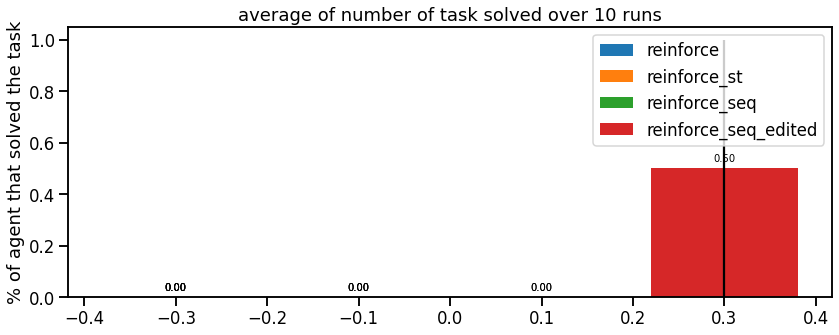

In [27]:


from rl_research.algorithms import agents

agent_names = list(agents.keys())


#exp = './experiments/data/gridlength15'
#exp = './experiments/data/gridlength20_2'
exp = './experiments/data/gridlength25'


width = 0.2
fig, ax = plt.subplots(figsize=(12, 5))

if len(agent_names) == 4:
    pos = [-1.5, -0.5, 0.5, 1.5]
if len(agent_names) == 3:
    pos = [-1, 0, 1]


results = pd.read_csv(f'{exp}/results.csv', header=[0], skipinitialspace=True)

num_runs = len(results[agent_names[0]].values)

for i, agent in enumerate(agent_names):
    data = results[agent].values

    mean = np.mean(data, axis=0)
    error = np.std(data, axis=0)
    rect = ax.bar(pos[i] * width, mean, width * 0.8,
                  yerr=error, ecolor='black', label=agent)
    #ax.bar_label(rect, padding=3)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():0.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),  size=10,textcoords = 'offset points')
ax.set_ylabel('% of agent that solved the task')
ax.set_title(f'average of number of task solved over {num_runs} runs')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)

ax.legend()

fig.tight_layout()

plt.show()


In [19]:
pwd

'/home/rmapkay/research_project'

In [ ]:
import copy
import sys
sys.path.insert(1, '../')

import gym
import gym_keygrid

import matplotlib.pyplot as plt

from rl_research.algorithms.reinforce_count_states import train as train_reinforce_state
from rl_research.algorithms.reinforce_count_seq import train as train_reinforce_seq
from rl_research.utils import plot_intrinsic_scores

# algorithm_names = ["reinforce_res_st",
#                    "reinforce_res_seq"
#                    ]

# algorithm_functions = [train_reinforce_state,
#                        train_reinforce_seq
#                       ]

# algorithms = list(zip(algorithm_names, algorithm_functions))

# agents = []

# # 1D env

# env = gym.make('keygrid-v0', grid_length=10)
# num_eps = 200
# logs = False

# for algorithm_name, algorithm_function in algorithms:
#     agent = algorithm_function(env, num_eps, logs=logs)
#     agents.append(agent)

# # 2D env

# env = gym.make('keygrid-v1', grid_length=8)
# num_eps = 200
# logs = False

# for algorithm_name, algorithm_function in algorithms:
#     agent = algorithm_function(env, num_eps, logs=logs)
#     agents.append(agent)

# plot the results

fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharey=False)

for i, a in enumerate(agents):
    ax = axes[i//2][i%2]
    if i < 2:
        ax.set_ylim([0, 10])
    else:
        ax.set_ylim([0, 70])

    plot_intrinsic_scores(a.intrinsic_scores, ax, a.space_visitation)

plt.show()
